# Machine Learning Foundations: Gradient Descent

**Summary**
This notebook covers the implementation of simple linear regression from scratch using gradient descent, including cost function visualization and optimization path analysis.

**Key Takeaways:**

1.  **Model Representation**: Understanding the linear function $f_{w,b}(x) = wx + b$.
2.  **Cost Function**: Implementation of the squared error cost function to evaluate model performance.
3.  **Gradient Descent**: Derivation and implementation of the update rules for parameters $w$ and $b$.
4.  **Visualization**: Using contour and quiver plots to visualize the cost surface and the optimization path.
5.  **Hyperparameters**: Understanding the effect of the learning rate $\alpha$ on convergence and divergence.

---

Simple gradient descent for linear regression


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
x_train_data = np.array([1, 2, 3, 4, 5])
y_train_data = np.array([300, 500, 700, 900, 1100])

In [ ]:
def compute_cost(x, y, w, b):
    """Computes the cost over all examples
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      cost (scalar): cost
    """

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2

    total_cost = 1 / (2 * m) * cost
    return total_cost

In [8]:
def compute_gradient(x, y, w, b):
    """Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

Gradient descent directionshown in quiver plot


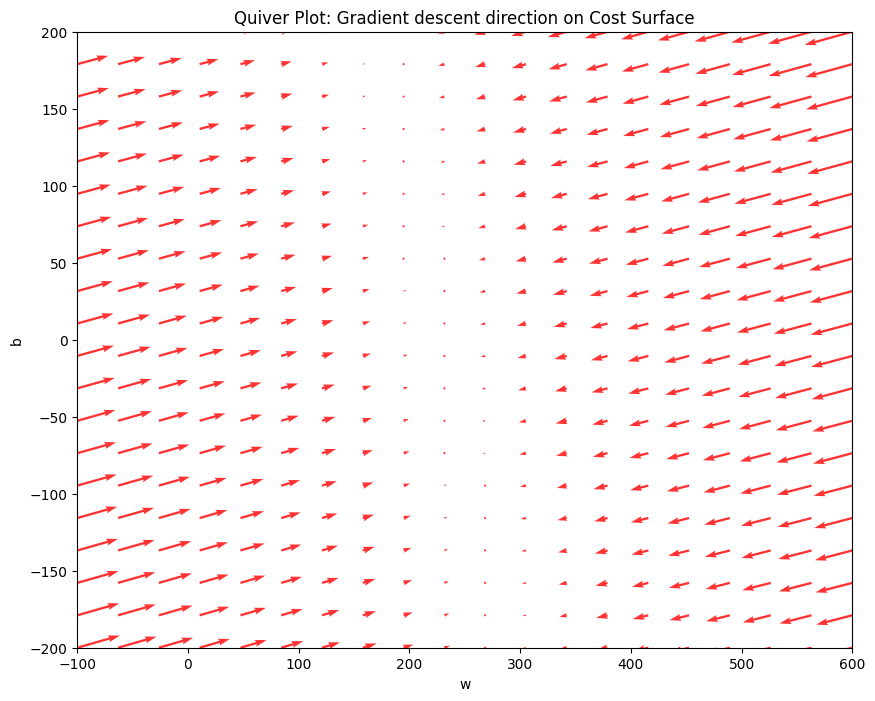

In [47]:
w_range = np.linspace(-100, 600, 20)
b_range = np.linspace(-200, 200, 20)
W, B = np.meshgrid(w_range, b_range)

dj_dw_grid = np.zeros(W.shape)
dj_db_grid = np.zeros(B.shape)
cost_grid = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dj_dw, dj_db = compute_gradient(
            x_train_data, y_train_data, W[i, j], B[i, j])
        dj_dw_grid[i, j] = dj_dw
        dj_db_grid[i, j] = dj_db
        cost_grid[i, j] = compute_cost(
            x_train_data, y_train_data, W[i, j], B[i, j])

plt.figure(figsize=(10, 8))

plt.xlabel('w')
plt.ylabel('b')
plt.title('Quiver Plot: Gradient descent direction on Cost Surface')
plt.quiver(W, B, -dj_dw_grid, -dj_db_grid, color='red', alpha=0.8)
plt.xlim(-100, 600)
plt.ylim(-200, 200)
plt.show()

Gradient Descent Algorithm


In [94]:
def gradient_descent(x, y, w_initial, b_initial, learning_rate, num_iterations, cost_function, gradient_function):

    w = w_initial
    b = b_initial

    # Number of training examples
    m = x.shape[0]

    cost_history = []
    param_history = []

    for i in range(num_iterations):
        # Computing gradient
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Updating parameters
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Computing cost
        cost = cost_function(x, y, w, b)

        # Storing history
        cost_history.append(cost)
        param_history.append((w, b))

        # Printing cost every 50 iterations
        if i % 1000 == 0:
            print(f"Iteration {i:4}: Cost = {cost:0.2e}",
                  f"f(dj_dw) = {dj_dw:0.2e}",
                  f"f(dj_db) = {dj_db:0.2e}",
                  f"w = {w:0.2e}, b = {b:0.2e}")

    return w, b, cost_history, param_history

In [95]:
# Initializing parameters
w_initial = 0
b_initial = 0

learning_rate = 1.0e-2
num_iterations = 10000

w_final, b_final, cost_history, param_history = gradient_descent(
    x_train_data, y_train_data, w_initial, b_initial, learning_rate, num_iterations, compute_cost, compute_gradient)

Iteration    0: Cost = 2.22e+05 f(dj_dw) = -2.50e+03 f(dj_db) = -7.00e+02 w = 2.50e+01, b = 7.00e+00
Iteration 1000: Cost = 5.28e+00 f(dj_dw) = 3.57e-01 f(dj_db) = -1.29e+00 w = 2.02e+02, b = 9.24e+01
Iteration 2000: Cost = 1.79e-01 f(dj_dw) = 6.58e-02 f(dj_db) = -2.38e-01 w = 2.00e+02, b = 9.86e+01
Iteration 3000: Cost = 6.07e-03 f(dj_dw) = 1.21e-02 f(dj_db) = -4.37e-02 w = 2.00e+02, b = 9.97e+01
Iteration 4000: Cost = 2.06e-04 f(dj_dw) = 2.23e-03 f(dj_db) = -8.06e-03 w = 2.00e+02, b = 1.00e+02
Iteration 5000: Cost = 6.99e-06 f(dj_dw) = 4.11e-04 f(dj_db) = -1.48e-03 w = 2.00e+02, b = 1.00e+02
Iteration 6000: Cost = 2.37e-07 f(dj_dw) = 7.57e-05 f(dj_db) = -2.73e-04 w = 2.00e+02, b = 1.00e+02
Iteration 7000: Cost = 8.04e-09 f(dj_dw) = 1.39e-05 f(dj_db) = -5.03e-05 w = 2.00e+02, b = 1.00e+02
Iteration 8000: Cost = 2.73e-10 f(dj_dw) = 2.57e-06 f(dj_db) = -9.27e-06 w = 2.00e+02, b = 1.00e+02
Iteration 9000: Cost = 9.25e-12 f(dj_dw) = 4.73e-07 f(dj_db) = -1.71e-06 w = 2.00e+02, b = 1.00e+02

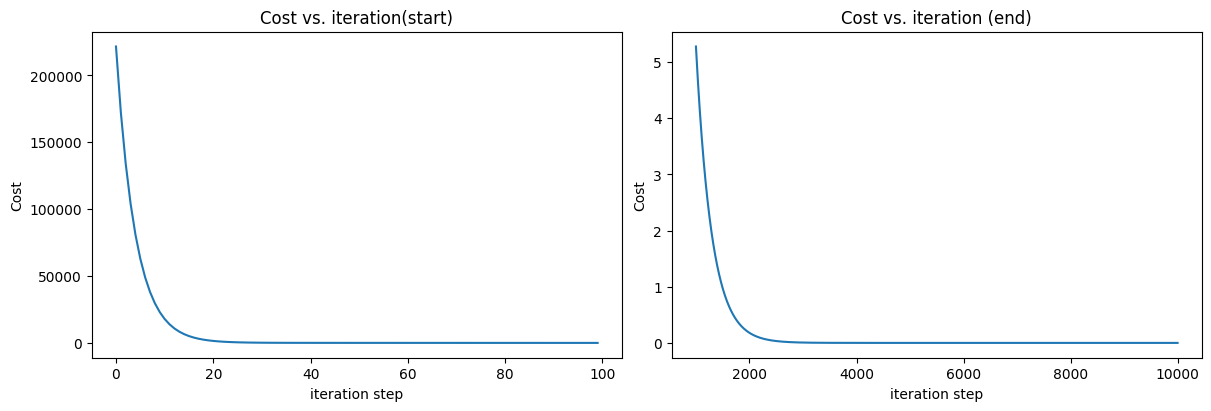

In [96]:
# Cost vs Iteration plot

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])

ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [97]:
print(
    f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(
    f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(
    f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


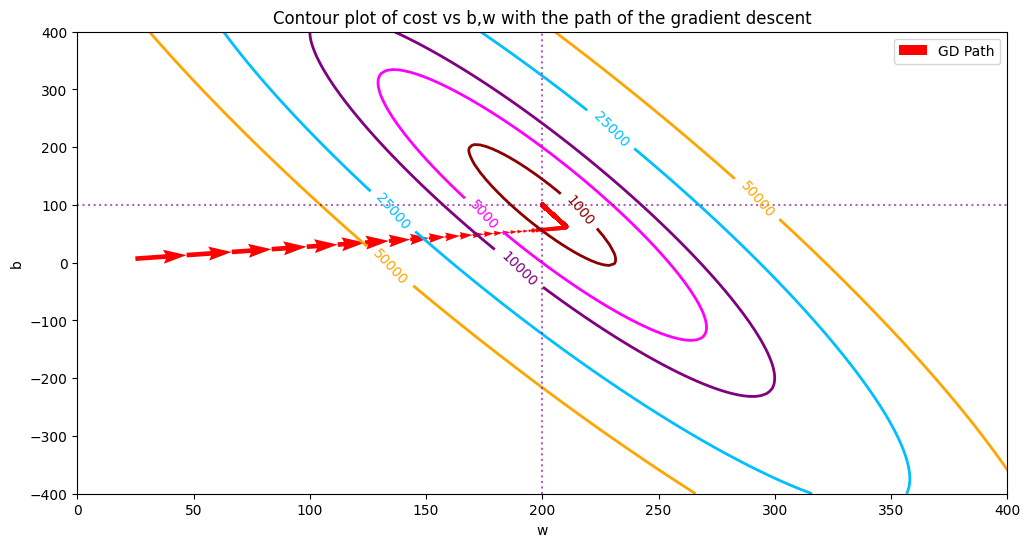

In [105]:
param_history = np.array(param_history)
w_final, b_final = param_history[-1, 0], param_history[-1, 1]

w_range = np.linspace(0, 500, 200)
b_range = np.linspace(-400, 400, 200)
W, B = np.meshgrid(w_range, b_range)
Z = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = compute_cost(x_train_data, y_train_data, W[i, j], B[i, j])

plt.figure(figsize=(12, 6))
levels = [1000, 5000, 10000, 25000, 50000]
colors = ['darkred', 'magenta', 'purple', 'deepskyblue', 'orange']
cp = plt.contour(W, B, Z, levels=levels, colors=colors, linewidths=2)
plt.clabel(cp, inline=1, fontsize=10, fmt='%1.0f')

plt.axvline(x=w_final, color='purple', linestyle=':', alpha=0.6)
plt.axhline(y=b_final, color='purple', linestyle=':', alpha=0.6)

w_path = param_history[:, 0]
b_path = param_history[:, 1]

dw = np.diff(w_path)
db = np.diff(b_path)

plt.quiver(w_path[:-1], b_path[:-1], dw, db, color='red',
           angles='xy', scale_units='xy', scale=1, width=0.005, label='GD Path')

plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of cost vs b,w with the path of the gradient descent')
plt.legend()

plt.xlim(0, 400)
plt.ylim(-400, 400)

plt.show()